In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [63]:

df = pd.read_csv("full.csv")

In [64]:
# Display first few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Embarked WikiId  \
0      0         A/5 21171   7.2500  ...        S  691.0   
1      0          PC 17599  71.2833  ...        C   90.0   
2      0  STON/O2. 3101282   7.9250  ...        S  865.0   
3      0            113803  53.1000  ...        S  127.0   
4      0            

In [65]:
print(df.info())
print(df.describe())
print(df.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [66]:

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True) 

/var/folders/4s/469p4rwd60xgtx_fjxkh_5940000gn/T/ipykernel_16148/3720089876.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/4s/469p4rwd60xgtx_fjxkh_5940000gn/T/ipykernel_16148/3720089876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [67]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])

In [68]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'WikiId', 'Name_wiki', 'Age_wiki', 'Hometown',
                 'Boarded', 'Destination', 'Lifeboat', 'Body', 'Class'], inplace=True)


In [69]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [70]:
print(df[['Sex', 'Embarked']].nunique())

Sex         2
Embarked    3
dtype: int64


In [71]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
print(y_train.isnull().sum())


328


In [74]:
X_train = X_train[y_train.notnull()]
y_train = y_train.dropna()


In [75]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_train = y_train.astype(int)


In [77]:
print(y_test.isnull().sum())  # Check if y_test has NaN values
X_test = X_test[~y_test.isnull()]
y_test = y_test.dropna()
df = df[df['Survived'].notnull()]  # Remove rows where 'Survived' is NaN


90


In [78]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


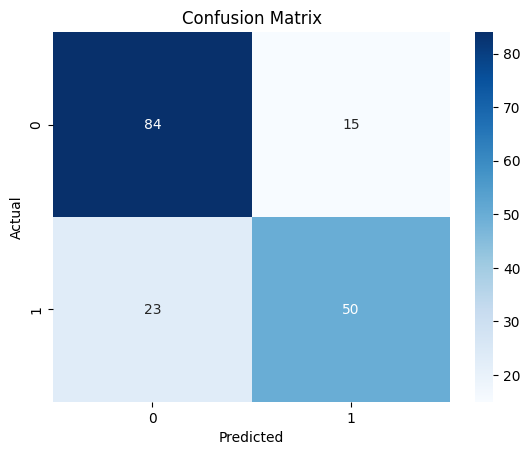

In [79]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [80]:


print(classification_report(y_test, y_pred))

# Check unseen record
unseen_data = np.array([[3, 1, 22, 1, 0, 7.25, 2]])  # Example
unseen_data = scaler.transform(unseen_data)
prediction = model.predict(unseen_data)
print("Survived" if prediction[0] == 1 else "Not Survived")


              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82        99
         1.0       0.77      0.68      0.72        73

    accuracy                           0.78       172
   macro avg       0.78      0.77      0.77       172
weighted avg       0.78      0.78      0.78       172

Not Survived


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
